# Exploring SDG&E Data

This data is downloaded in a different format than the other electricity grid data. Instead of line this the electric grid is in polygons. This notebook explores how to handle the polygon data.


In [11]:
# load necessary libraries
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio

## SDG&E Load Capacity

In [5]:
# load SDGE load capacity data
sdge_load_capacity = gpd.read_file("../../../../capstone/electrigrid/data/utilities/sandiego_grid/ICA_MAP_PROD_LoadCapacityGrids.geojson")

In [7]:
# check the crs 
sdge_load_capacity.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

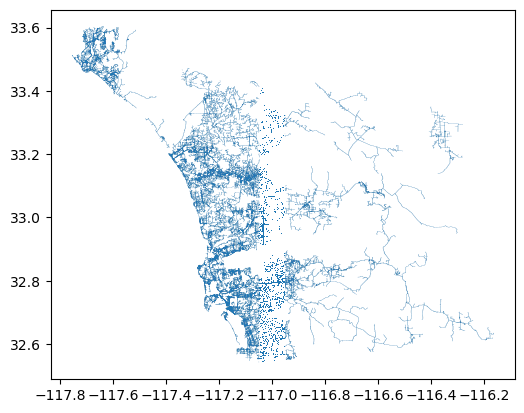

In [ ]:
# initial plot of load capacity
fig, ax = plt.subplots()

sdge_load_capacity.plot(ax=ax)

plt.show()

## SDG&E Generation Capacity

In [8]:
# load SDGE generation capacity data
sdge_generation_capacity = gpd.read_file("../../../../capstone/electrigrid/data/utilities/sandiego_grid/ICA_MAP_PROD_GenerationCapacityGrids.geojson")

In [9]:
# check CRS
sdge_generation_capacity.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

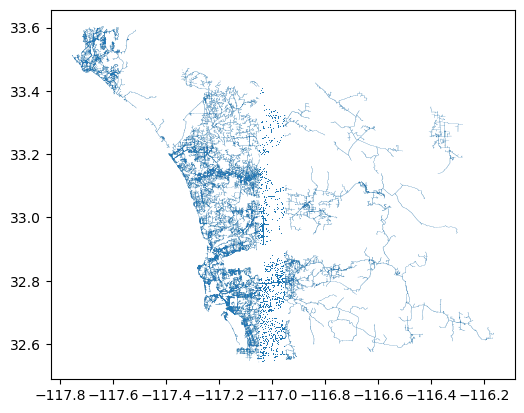

In [ ]:
# initial plot of generation capacity
fig, ax = plt.subplots()

sdge_generation_capacity.plot(ax=ax)
plt.show()

## Difference between the load and generation capacities

In [ ]:
# make sure the crs match 
assert sdge_load_capacity.crs == sdge_generation_capacity.crs

Lets see if we can find the difference between the two capacity maps. First we need to rasterize the data. 

In [12]:
# create a numeric unique value for each row
sdge_load_capacity['id'] = range(0,len(sdge_load_capacity))

# create tuples of geometry, value pairs, where value is the attribute value you want to burn
geom_value = ((geom,value) for geom, value in zip(sdge_load_capacity.geometry, sdge_load_capacity['id']))


In [ ]:

# Rasterize vector using the shape and transform of the raster
rasterized = rasterio.features.rasterize(geom_value,
                                out_shape = raster.shape,
                                transform = raster.transform,
                                all_touched = True,
                                fill = -5,   # background value
                                merge_alg = MergeAlg.replace,
                                dtype = int16)


In [9]:
load_gen_diff = sdge_load_capacity - sdge_generation_capacity

/tmp/ipykernel_1354969/3167242563.py:1: FutureWarning: '-' operator will be deprecated. Use the 'difference' method instead.
  load_gen_diff = sdge_load_capacity - sdge_generation_capacity


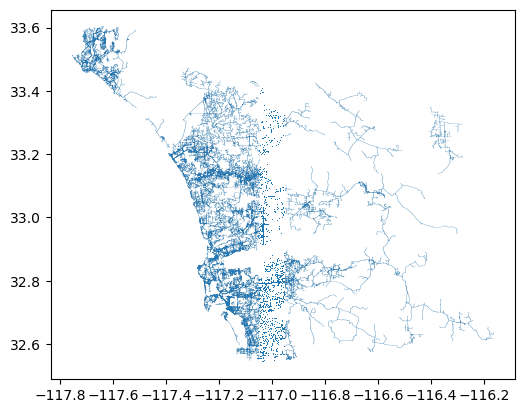

In [10]:
fig, ax = plt.subplots()

load_gen_diff.plot(ax=ax)
plt.show()